In [8]:
from fastai.vision.all import *

bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

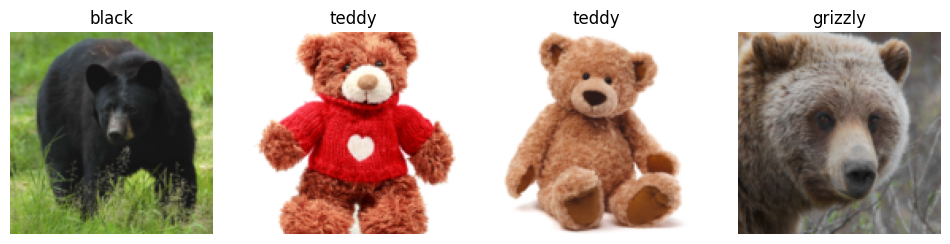

In [9]:
path = "C:\\Users\\MONSTER\\Desktop\\archive\\bears"
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

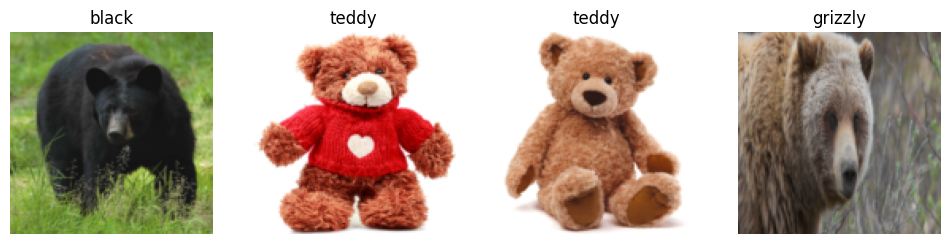

In [10]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

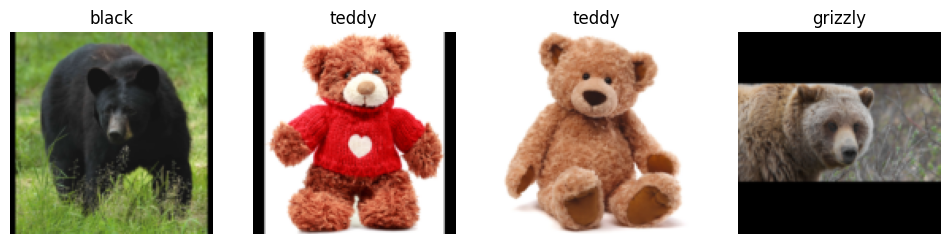

In [11]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode="zeros"))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

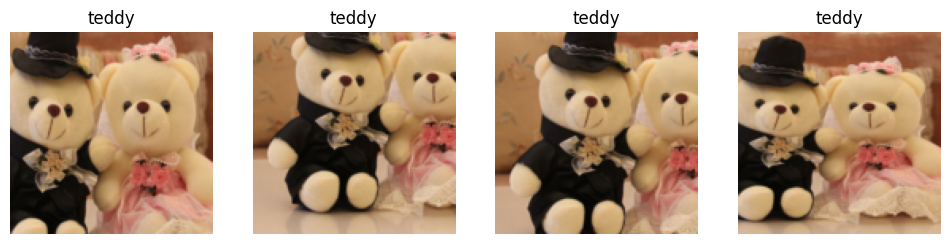

In [13]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

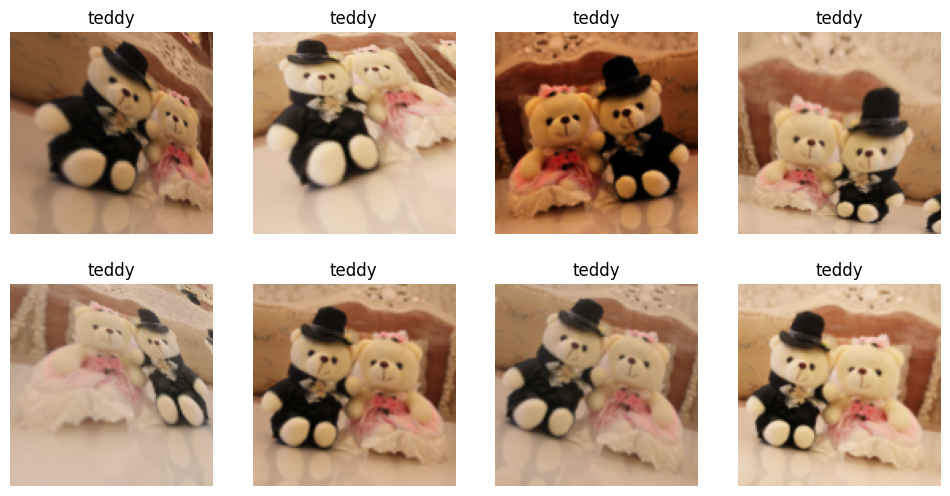

In [15]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [16]:
bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\MONSTER/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:10<00:00, 4.36MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.414280,0.213392,0.105263,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.315212,0.075709,0.000000,00:26
1,0.218871,0.009610,0.000000,00:25
2,0.166642,0.003905,0.000000,00:25
3,0.145182,0.004286,0.000000,00:25


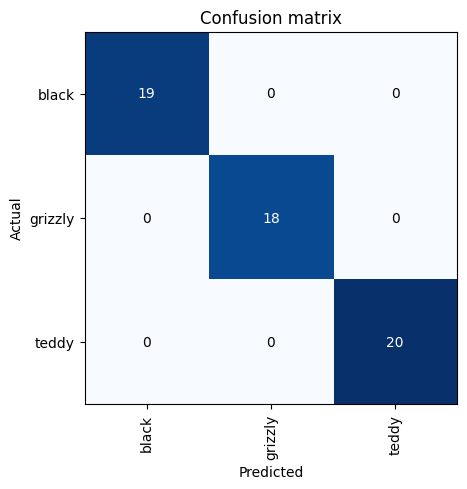

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [18]:
learn.export()

In [19]:
path = Path()
path.ls(file_exts=".pkl")

(#1) [Path('export.pkl')]

In [20]:
learn_inf = load_learner(path/"export.pkl")
learn_inf.predict("C:\\Users\\MONSTER\\Desktop\\the bear.png")

('grizzly', tensor(1), tensor([2.2344e-05, 9.9997e-01, 8.2484e-06]))

In [21]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [28]:
import ipywidgets as widgets

btn_upload = SimpleNamespace(data = ["C:\\Users\\MONSTER\\Desktop\\the bear.png"])

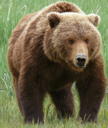

In [30]:
img = PILImage.create(btn_upload.data[-1])
img

In [31]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [33]:
pred, pred_idx, probs = learn_inf.predict(img)

In [34]:
lbl_pred = widgets.Label()
lbl_pred.value = f"Prediction: {pred}; Probability: {probs[pred_idx]:.04f}"
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [37]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128, 128))
    pred, pred_idx, probs = learn_inf.predict(img)
    lbl_pred.value = f"Prediciton: {pred}; Probability: {probs[pred_idx]:.04f}"

btn_run.on_click(on_click_classify)

In [38]:
btn_upload = widgets.FileUpload()

In [40]:
from ipywidgets import VBox, Label

VBox([widgets.Label("Select the bear!"),
      btn_upload, btn_run, out_pl, lbl_pred])